# Week 2 - decisiontrees und kNN

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

L50 with ground truth old groundtruth
Barplots of 4 diseases from ctd and primekg, with trained ML DecisionTree and afterwards evaluated importance of features 

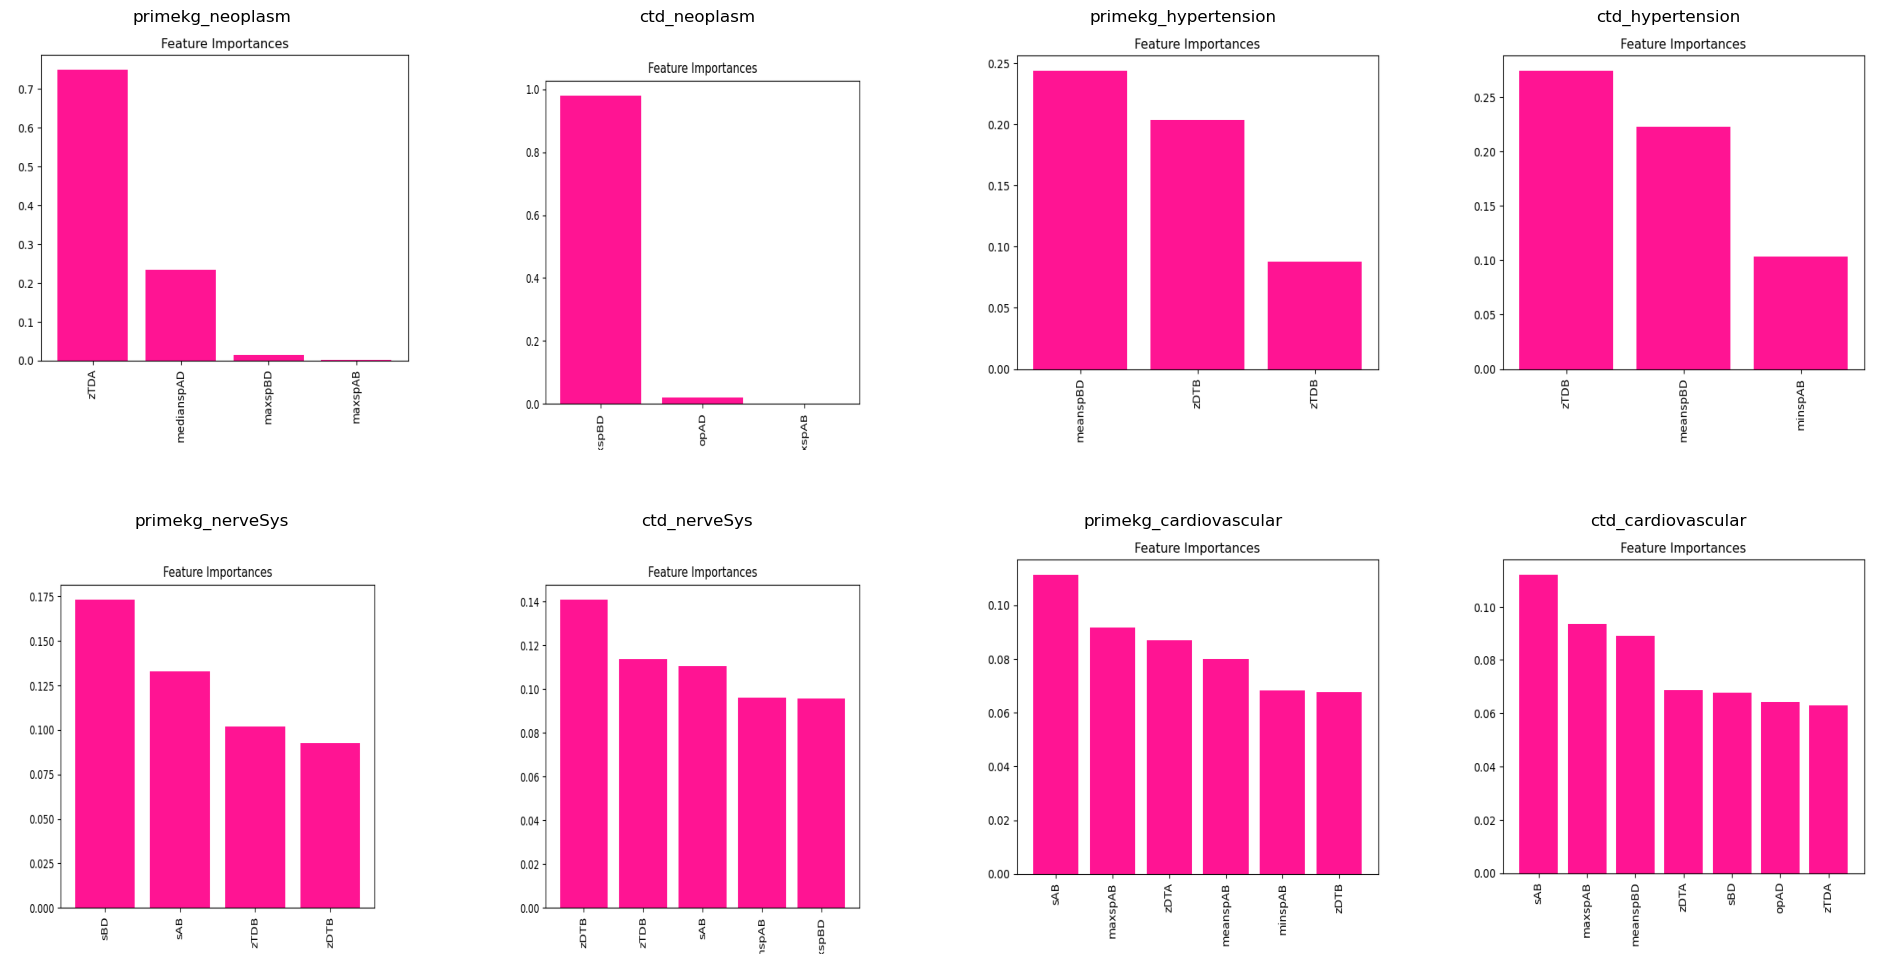

In [3]:
image_paths = ['primekg_neoplasm.png', 'ctd_neoplasm.png', 'primekg_hypertension.png', 'ctd_hypertension.png',
               'primekg_nerveSys.png', 'ctd_nerveSys.png', 'primekg_cardiovascular.png', 'ctd_cardiovascular.png']

captions = ['primekg_neoplasm', 'ctd_neoplasm', 'primekg_hypertension', 'ctd_hypertension',
            'primekg_nerveSys', 'ctd_nerveSys', 'primekg_cardiovascular', 'ctd_cardiovascular']

fig, axes = plt.subplots(2, 4, figsize=(24, 12))


for i, ax in enumerate(axes.flat):
    image = Image.open(image_paths[i])
    ax.imshow(image)
    ax.set_title(captions[i])
    ax.axis('off')
    ax.set_aspect('auto')

plt.show()

-> added new ground truth 
-> L50 für cardiovascular ctd vs primekg and afterwards evaluated feature importances 
- we also evaluated the decisiontree on the other 3 diseases 
- distribution of 0s (approved) and 1s (adverse) was always very unbalanced 
-> in cardiovascular altogether 48543 0s and 257 1s after merging with features 
-> in neoplasm and in nerve system for example more 1s than 0s with the 1s being significantly overrepresented 
-> for that reason we used parameters like stratify (to have a similiar distribution between training and test set), class_weight in our DecisionTreeClassifier to balance out the big difference, max_depth for the tree and removing features that were less important for the result of our DecisionTree

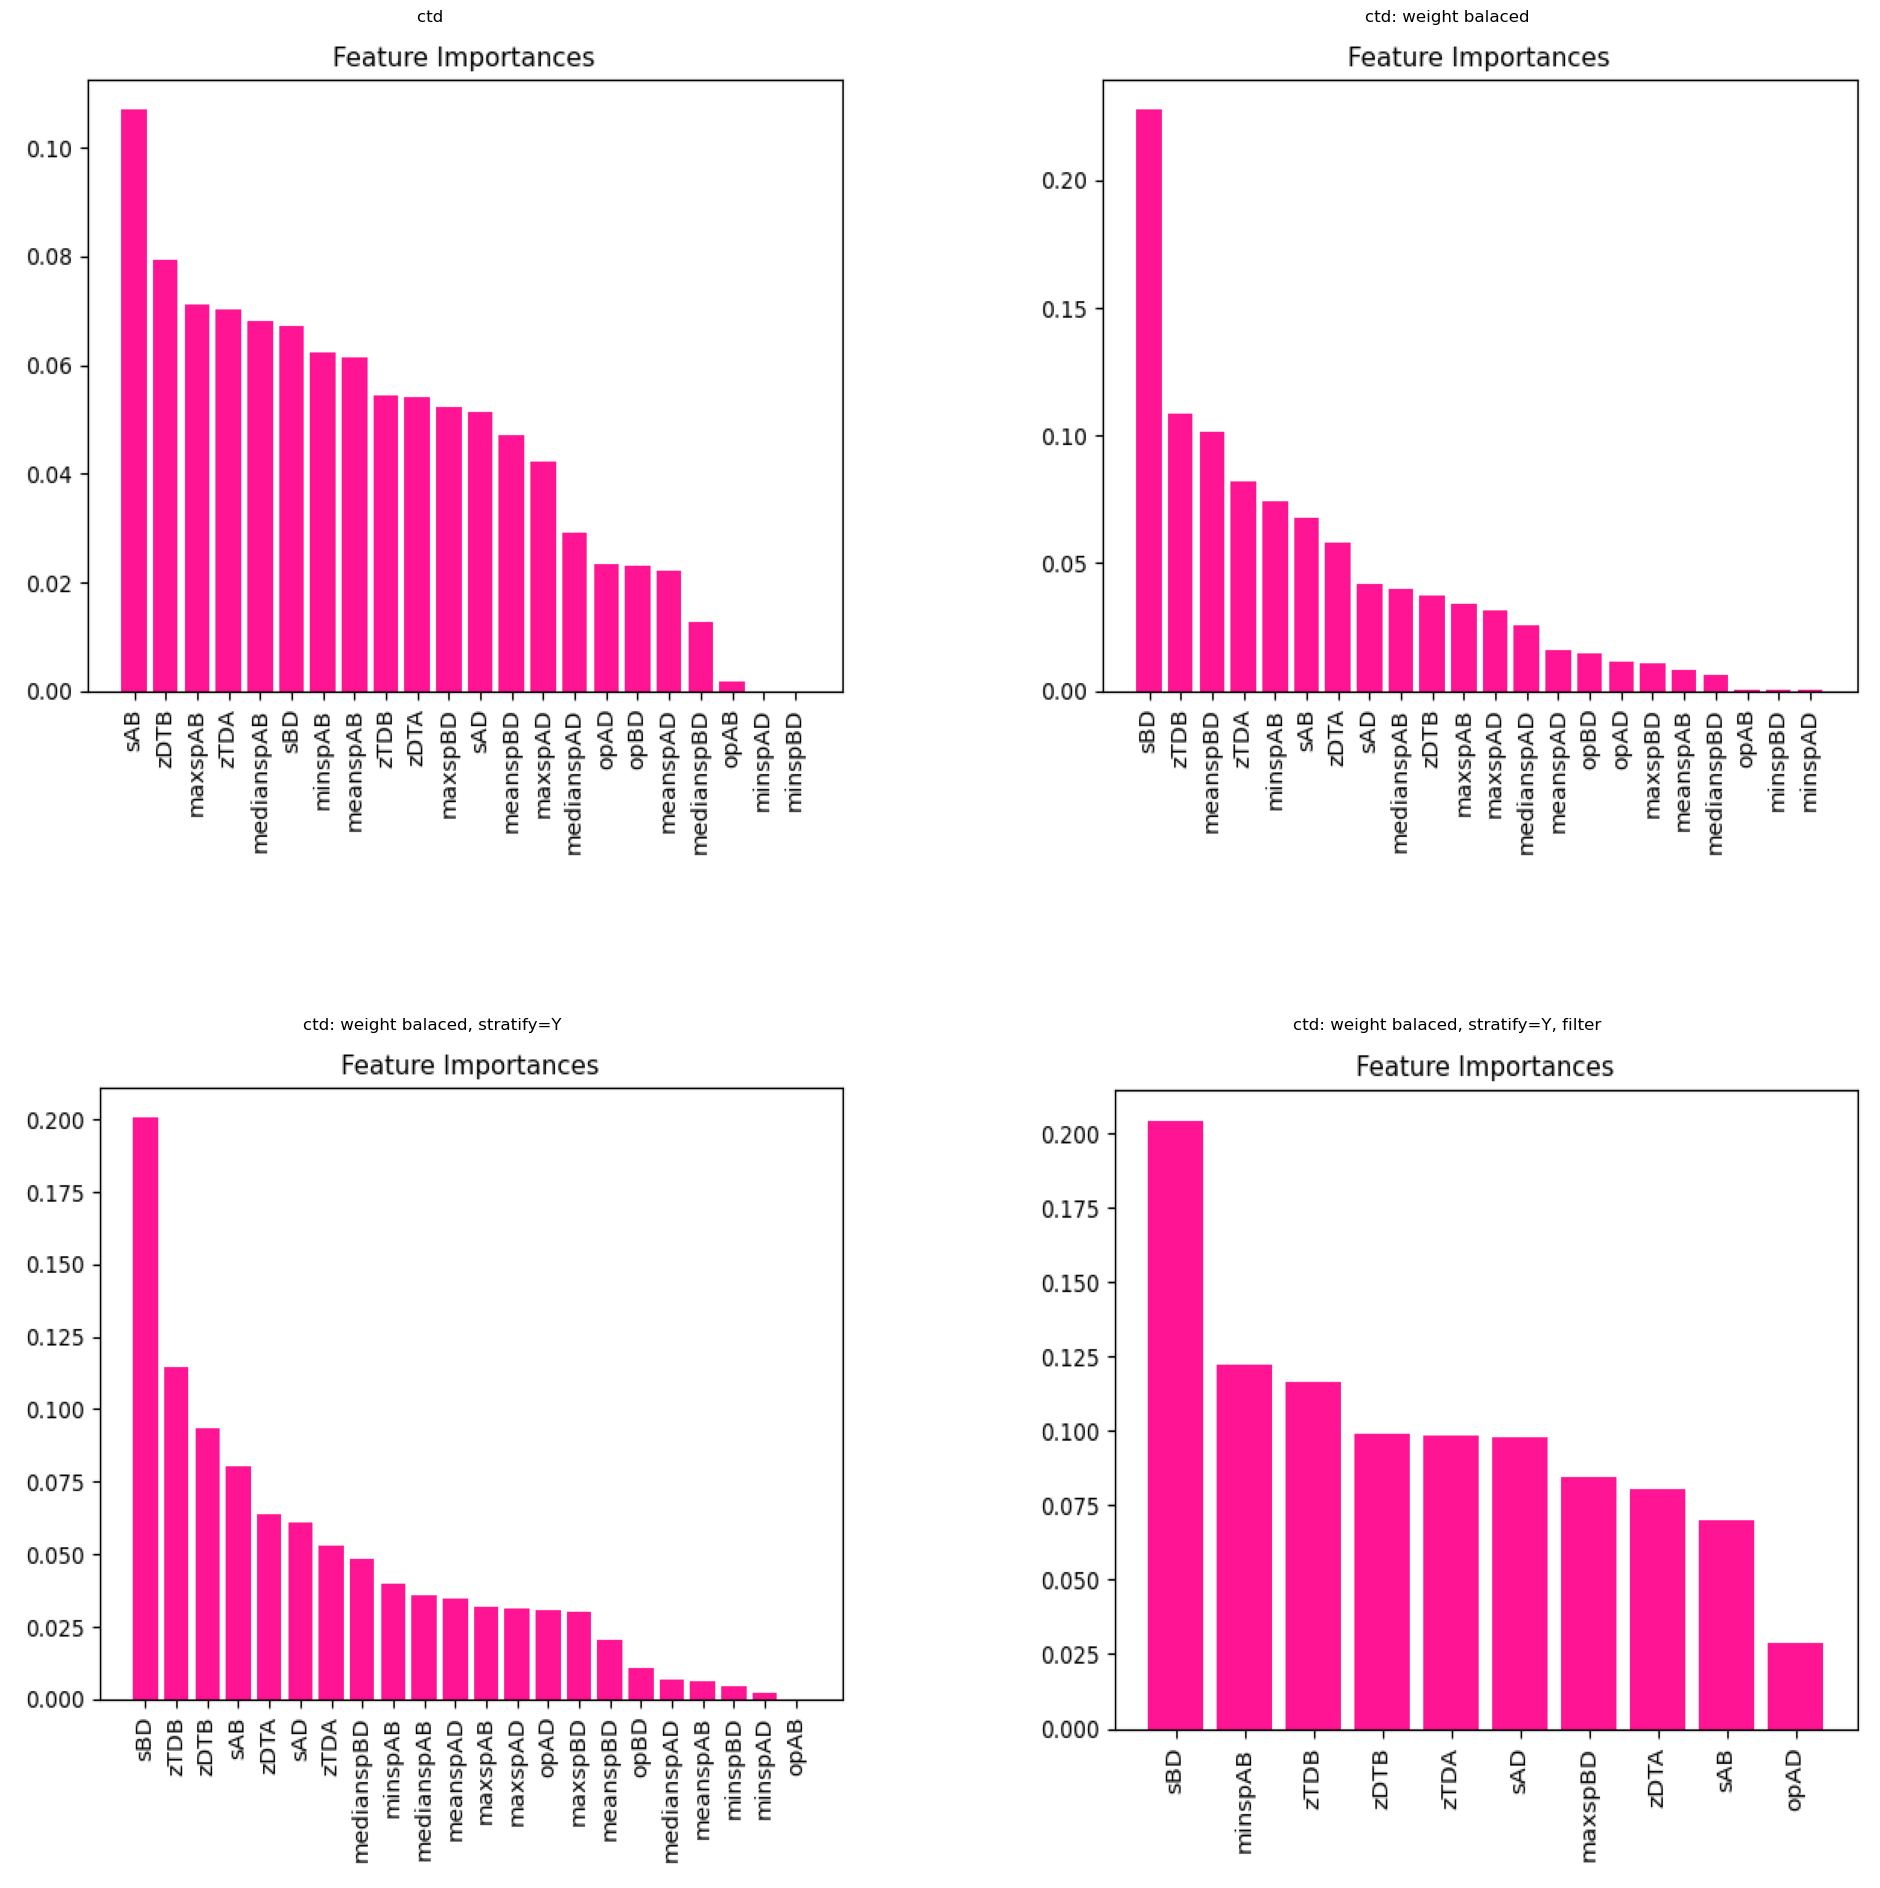

In [5]:
image_paths = ['bilder_week2/ctd_cardiovascular_nofilter_nostratify_ub.png', 'bilder_week2/ctd_cardiovascular_nofilter_nostratify_wb.png', 'bilder_week2/ctd_cardiovascuale_nofilter_stratification_wb.png', 'bilder_week2/ctd_cardiovascular_new.png']

captions = ['ctd ', 'ctd: weight balaced', 'ctd: weight balaced, stratify=Y', 'ctd: weight balaced, stratify=Y, filter']

fig, axes = plt.subplots(2, 2, figsize=(24, 24))


for i, ax in enumerate(axes.flat):
    image = Image.open(image_paths[i])
    ax.imshow(image)
    ax.set_title(captions[i])
    ax.axis('off')
    ax.set_aspect('auto')

plt.show()

ctd:

comparison classification report with different parameters
-> balanced weights + stratify already increase precision, recall for 1 (and f1 score)

report weights balanced  + stratify :
Accuracy: 0.9889344262295082
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.19      0.33      0.24        51

    accuracy                           0.99      9760
   macro avg       0.59      0.66      0.62      9760
weighted avg       0.99      0.99      0.99      9760

-> removed features increase precision,recall and f1 score for 1 as well 

report weights balanced  + stratify + removed features :
Accuracy: 0.9896516393442623
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.22      0.37      0.27        51

    accuracy                           0.99      9760
   macro avg       0.61      0.68      0.63      9760
weighted avg       0.99      0.99      0.99      9760

-> with max_depth very little improvement, only visible for f1-score 

report weights balanced  + stratify + removed features + max_depth=28:
Accuracy: 0.9899590163934426
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.22      0.37      0.28        51

    accuracy                           0.99      9760
   macro avg       0.61      0.68      0.64      9760
weighted avg       0.99      0.99      0.99      9760


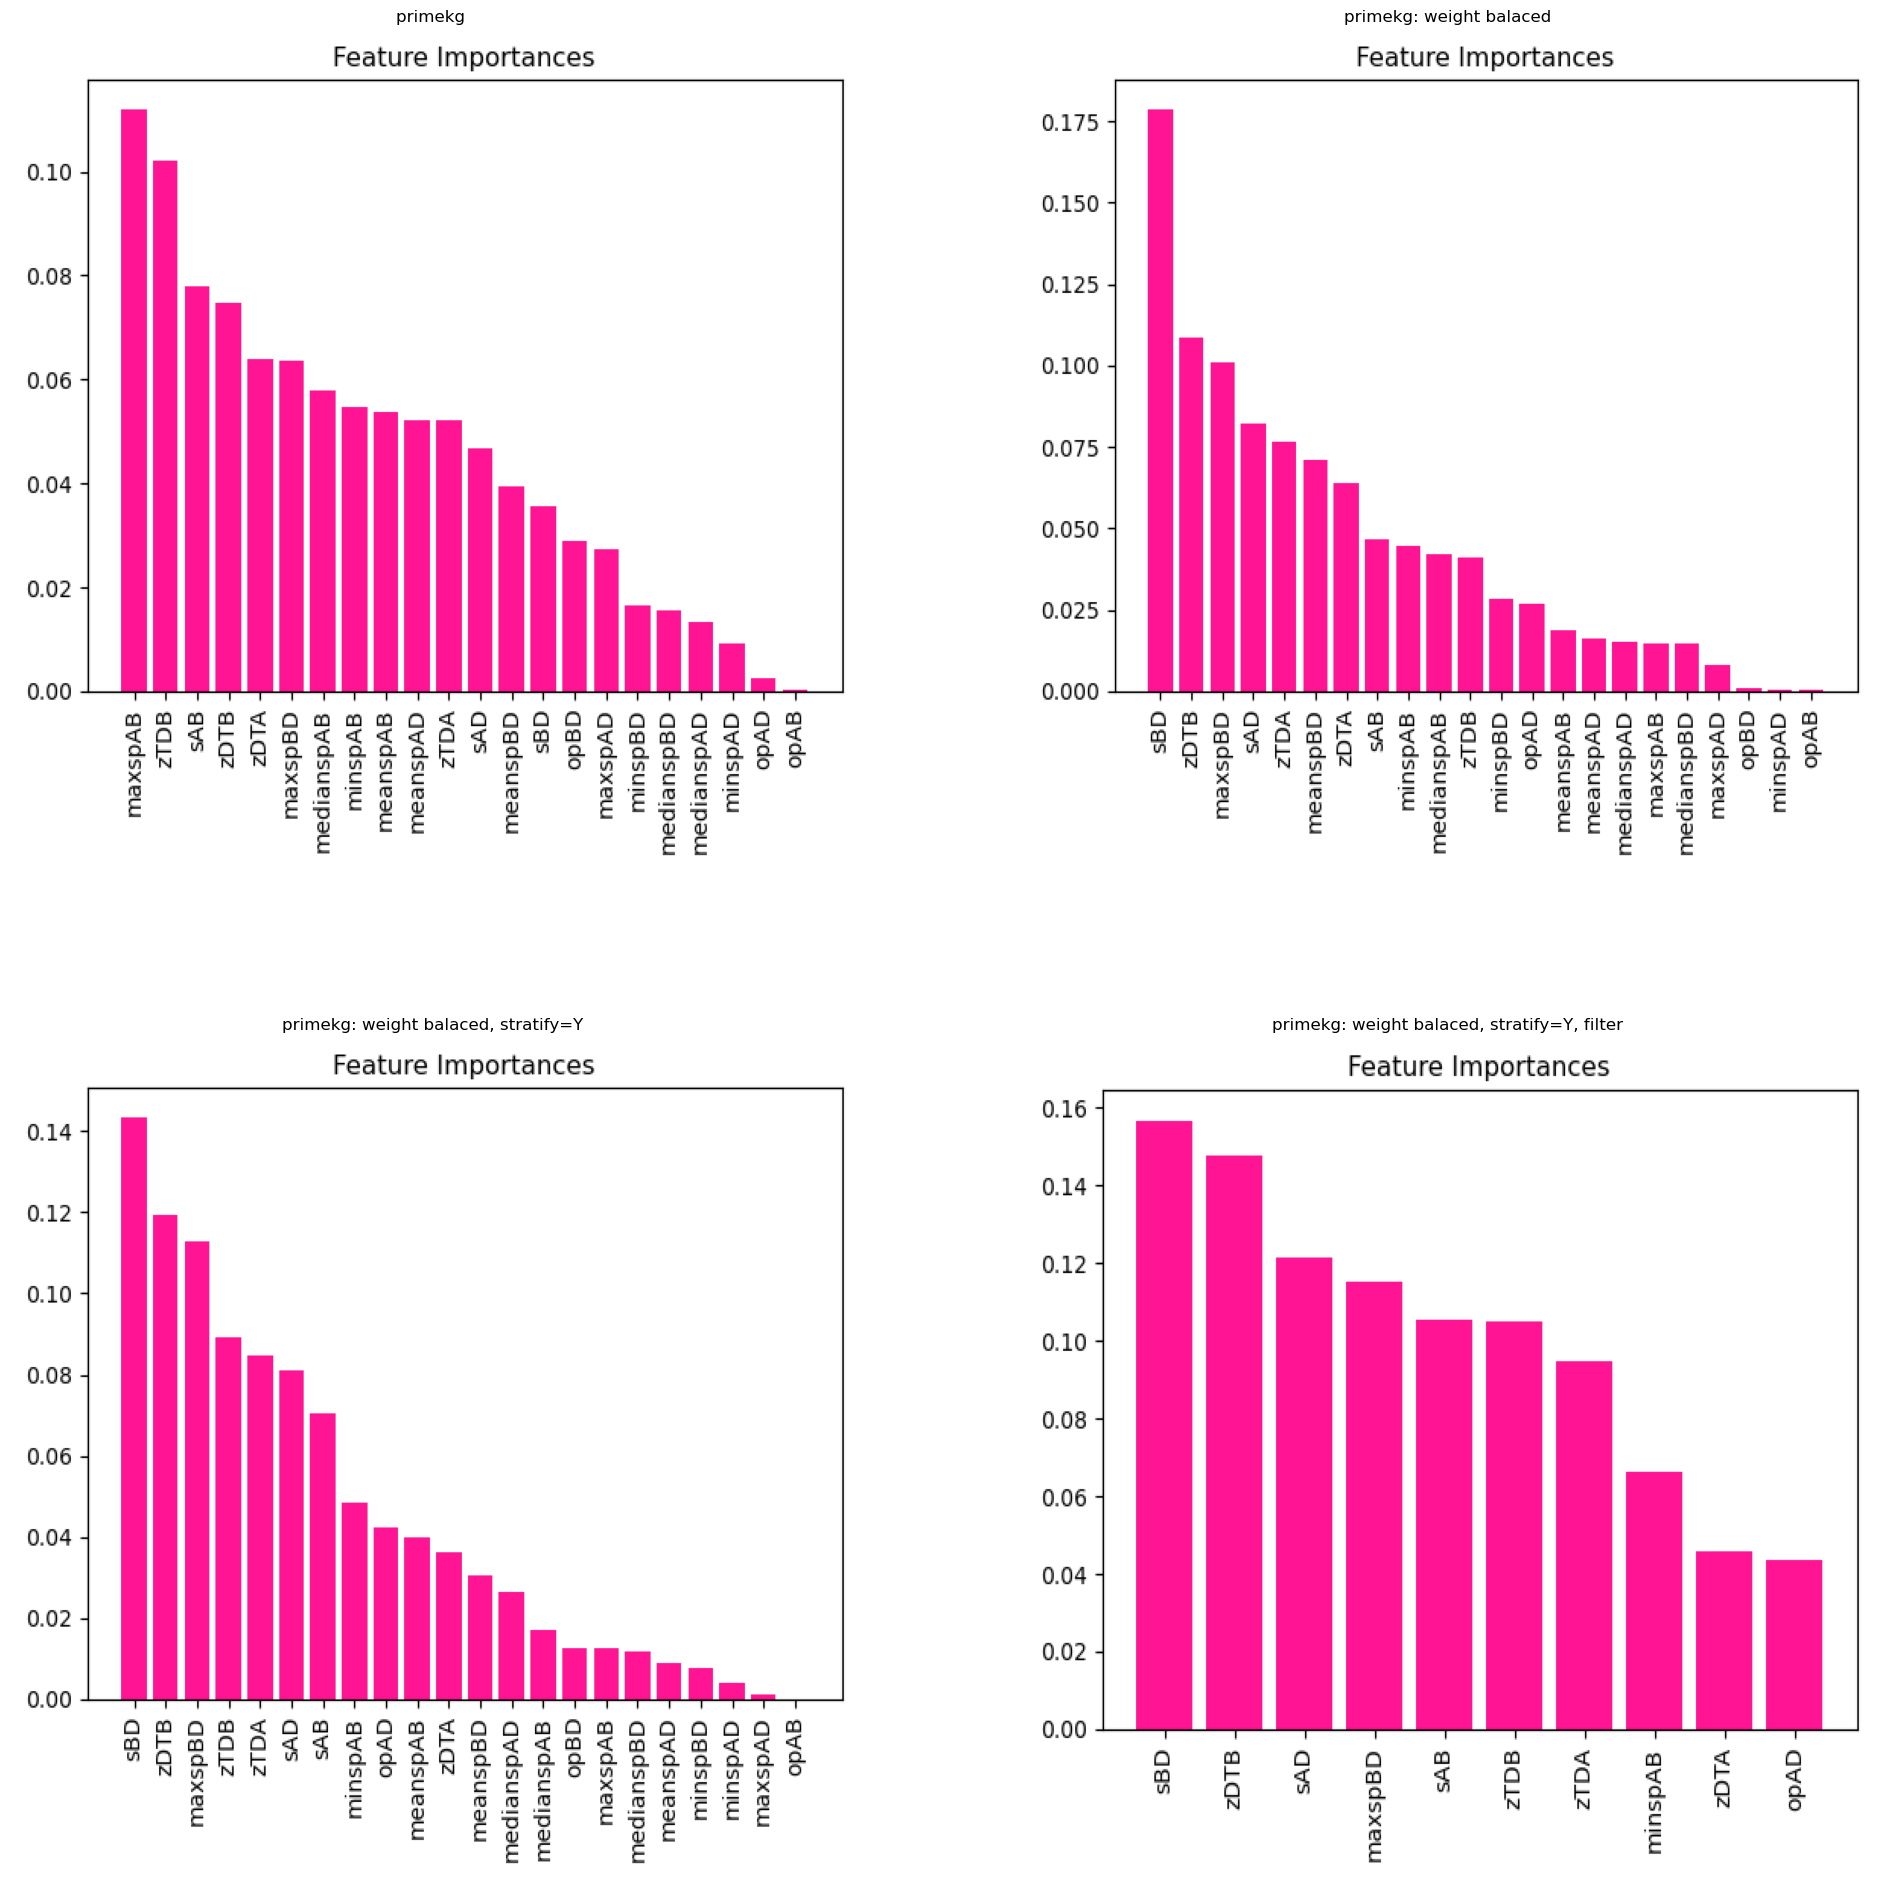

In [6]:
image_paths = ['bilder_week2/primekg_cardiovascular_nofilter_nostratify_ub.png', 'bilder_week2/primekg_cardiovascular_nofilter_nostratify_wb.png', 'bilder_week2/primekg_cardiovascular_nofilter_stratify_wb.png', 'bilder_week2/primekg_cardiovascular_new.png']

captions = ['primekg ', 'primekg: weight balaced', 'primekg: weight balaced, stratify=Y', 'primekg: weight balaced, stratify=Y, filter']

fig, axes = plt.subplots(2, 2, figsize=(24, 24))


for i, ax in enumerate(axes.flat):
    image = Image.open(image_paths[i])
    ax.imshow(image)
    ax.set_title(captions[i])
    ax.axis('off')
    ax.set_aspect('auto')

plt.show()

primekg:
comparison classification report with different parameters


report weights balanced  + stratify :
Accuracy: 0.9892418032786885
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.21      0.37      0.27        51

    accuracy                           0.99      9760
   macro avg       0.60      0.68      0.63      9760
weighted avg       0.99      0.99      0.99      9760

-> removing features didn't improve report, but decreased our parameters, so did changing the max_depth 
report weights balanced  + stratify + removed features :
Accuracy: 0.9881147540983607
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.18      0.37      0.25        51

    accuracy                           0.99      9760
   macro avg       0.59      0.68      0.62      9760
weighted avg       0.99      0.99      0.99      9760


- we started on a k-nearest neighbour model as well 
- first we did cross-validation to find the optimal k for the technique 
- after training with that 'best k' we saw that the default parameter (k=5) performed with less mismatches but the report results were sometimes increased
- accuracy for k=5 was always better than calculated k? cross validation correct? 
- again a very unbalanced distribution of 1s and 0s --> not sure if there was a mistake in the general approach or if these ML techniques just aren't suitable for our data and features 